In [1]:
import wavespectra 
import xarray as xr
import numpy as np 

efth = np.array([0.0000e+00, 1.0942e-03, 5.8909e-02, 2.0724e-01,
                 2.0267e-01, 1.6886e-01, 1.1980e-01, 7.7867e-02,
                 4.9664e-02, 3.2361e-02, 2.0902e-02, 1.3622e-02,
                 8.8645e-03, 5.6254e-03, 3.3722e-03, 2.0276e-03,
                 1.1350e-03, 4.5993e-04, 2.0441e-04, 0.0000e+00])


# Frequency in Hz
freq = np.array([0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
                 0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375,
                 0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525])


# Direction in degree
dir = np.array([0])

# The DataArray and Dataset objects below are ready to use with wavespectra
da = xr.DataArray(
    data=np.expand_dims(efth, 1),
    dims=["freq", "dir"],
    coords=dict(freq=freq, dir=dir),
    name="efth",
)
da.spec.hs()

In [4]:

from wavespectra.construct import construct_partition

freq = np.arange(0.030, 0.401, 0.001)

dir = np.arange(0, 360, 1)

ds = construct_partition(
    freq_name="jonswap",
    dir_name="cartwright",
    freq_kwargs={"freq":  freq, "fp": 0.1, "gamma": 3.3, "hs": 1.5},
    dir_kwargs={"dir": dir, "dm": 60, "dspr": 30},
)

In [24]:
freq[:5]

array([0.03 , 0.031, 0.032, 0.033, 0.034])

In [25]:
dir[:5]

array([0, 1, 2, 3, 4])

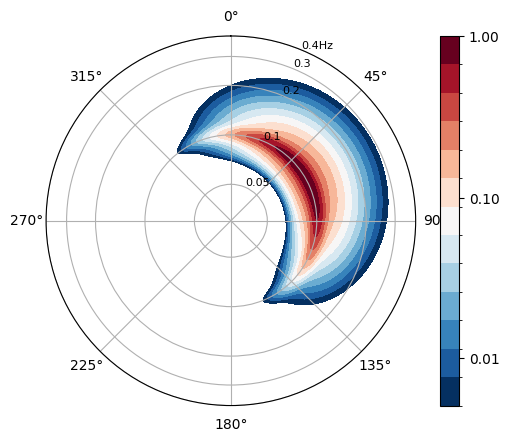

In [5]:
ds.spec.plot()


In [62]:
import numpy as np
import xarray as xr
import wavespectra
import requests
import matplotlib.pyplot as plt
from spectral_data import get_spectral_data as fetch_spectral_data
from spectral_data import freqDirection as fetch_direction_data


portlandBuoyID = 44007

# NDBC Raw Spectral Data
raw_spectralData = requests.get(f'https://www.ndbc.noaa.gov/data/realtime2/{portlandBuoyID}.data_spec')
# Spectral dataq
seperation, densities, frequencies, periods = fetch_spectral_data(raw_spectralData)
densities = np.array(densities)
frequencies = np.array(frequencies)
periods = np.array(periods)
raw_directionalData = requests.get(f'https://www.ndbc.noaa.gov/data/realtime2/{portlandBuoyID}.swdir')
    
# Directional data 
directions, freqs = fetch_direction_data(raw_directionalData)
directions = np.array(directions)
# freqs == frequencies
efth = densities/directions


C:\Users\fuzzi\AppData\Local\Temp\ipykernel_10300\2889272268.py:25: RuntimeWarning: divide by zero encountered in divide
  efth = densities/directions


In [49]:
with open("directional_data.txt","w") as f:
    f.write(raw_directionalData.text) 
with open("spectral_data.txt","w") as f:
    f.write(raw_spectralData.text)

In [64]:
print("densities",densities.shape, densities[:5])
print("frequencies",frequencies.shape, frequencies[:5])
print("periods",periods.shape, periods[:5])
print("directions",directions.shape, directions)
print("efth",efth.shape, efth[:5])

# freq = np.array(frequencies) 
# dir = np.array([0])

densities (46,) [0. 0. 0. 0. 0.]
frequencies (46,) [0.033 0.038 0.043 0.048 0.053]
periods (46,) [30.3030303  26.31578947 23.25581395 20.83333333 18.86792453]
directions (46,) [999. 999. 999. 999. 999. 999. 999. 216. 228.  32.   0. 252. 108. 172.
 104. 104.  48. 168. 192. 228. 180. 184. 196. 200. 200. 208. 220. 212.
 212. 212. 216. 220. 216. 228. 224. 216. 216. 220. 220. 220. 228. 228.
 244. 216. 228. 232.]
efth (46,) [0. 0. 0. 0. 0.]


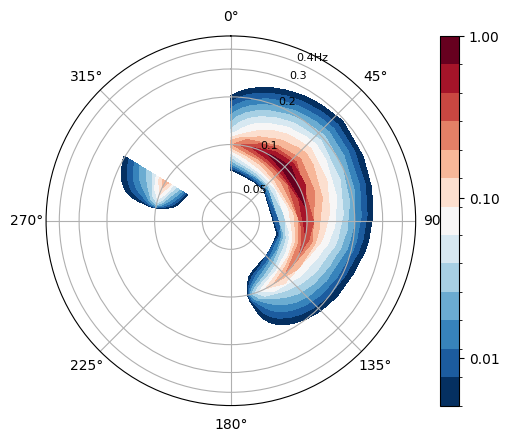

In [65]:
ds = construct_partition(
    freq_name="jonswap",
    dir_name="cartwright",
    freq_kwargs={"freq":  frequencies, "fp": 0.1, "gamma": 3.3, "hs": 1.5},
    dir_kwargs={"dir": directions, "dm": 60, "dspr": 30},
)
ds.spec.plot()
